In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:00


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from pmdarima.arima import auto_arima


In [ ]:
# Read dataset file
df = pd.read_csv('Lab4_1.csv')
df_origin = df
df = df[['Electric Use']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets by 7:2:1
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Electric Use'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=216.521, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=213.152, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=213.171, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=265.675, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=211.509, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=211.543, Time=0.34 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=213.946, Time=0.36 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=213.838, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=212.177, Time=0.42 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=219.742, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 2.231 seconds


ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -101.754
Date:                Sun, 28 Apr 2024   AIC                            211.509
Time:                        16:38:22   BIC                            214.599
Sample:                             0   HQIC                           211.667
                                 - 16                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    578.8288    272.955      2.121      0.034      43.846    1113.811
ar.L1          0.8064      0.629      1.281      0.200      -0.427       2.040
ar.L2         -0.4480      0.491     -0.913      0.361      -1.410       0.513
sigma2      1.859e+04   7934.966      2.342      0.019    3033.272    3.41e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                10.74
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                             1.45
Prob(H) (two-sided):                  0.35   Kurtosis:                         5.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# make predictions on the testing set
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Electric Use'])
y_pred = model.predict(n_periods=len(y_test))

# make predictions on the validate set
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Electric Use'])
y_pred_val =  model.predict(n_periods=len(y_val))

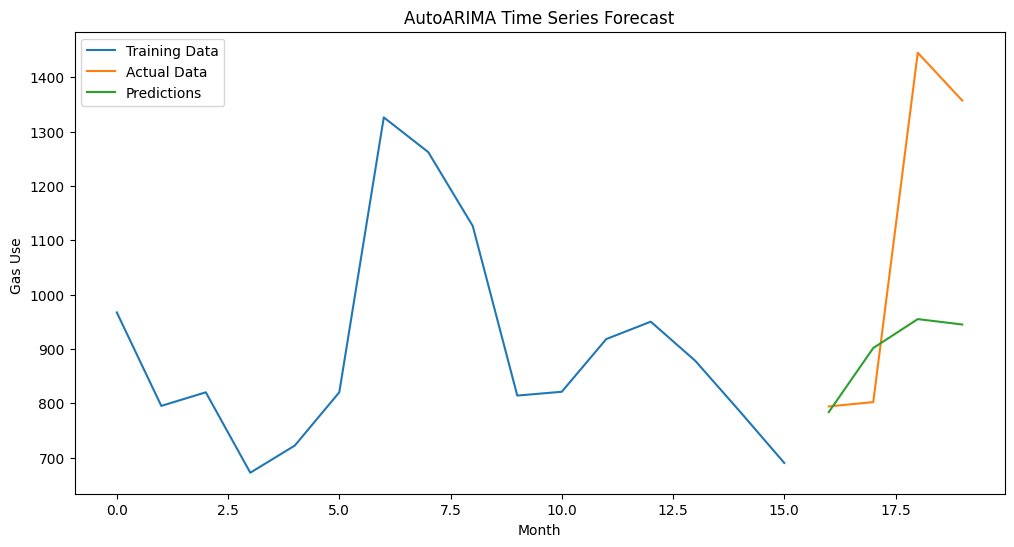

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Data')
plt.plot(test_data.index, y_pred, label='Predictions')
plt.title('AutoARIMA Time Series Forecast')
plt.xlabel('Month')
plt.ylabel('Gas Use ')
plt.legend()
plt.show()

In [ ]:
from datetime import datetime

df_origin['Month_Num'] = df_origin['Month'].apply(lambda x: datetime.strptime(x, '%b').month)
df_origin

,Month,Gas Use,Electric Use,Month_Num
0,Jan,244,967,1
1,Feb,228,795,2
2,Mar,153,820,3
3,Apr,140,672,4
4,May,55,722,5
5,Jun,34,820,6
6,Jul,30,1326,7
7,Aug,28,1262,8
8,Sep,29,1126,9
9,Oct,41,814,10


In [ ]:
x=np.array(df_origin["Month_Num"]).reshape((-1, 1))
y=np.array(df_origin["Electric Use"]).reshape((-1, 1))
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
print("Intercept term: ",model.intercept_)
print("R_coef: ", model.coef_)
print("R Square: ", model.score(x, y))

Intercept term:  [838.40909091]
R_coef:  [[16.43706294]]
R Square:  0.06609465466286213


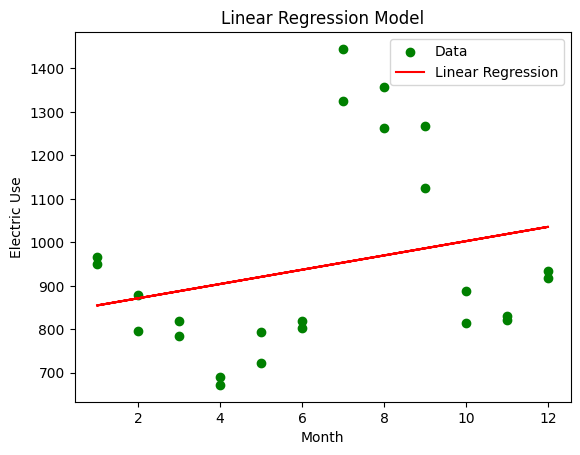

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.scatter(x, y, color='green', label='Data')

plt.plot(x, model.predict(x), color='red', label='Linear Regression')

plt.xlabel('Month')
plt.ylabel('Electric Use')
plt.title('Linear Regression Model')
plt.legend()

plt.show()
